

### The Exclusive OR (XOR)

Consider the classical Exlusive Or (XOR) [problem](https://en.wikipedia.org/wiki/Exclusive_or) involving two inputs  **x1**  and  **x2**  where  $x_i ∈ (0,1)$.

This problem states that the output should be 1 if exactly one of the inputs is 1 and 0 otherwise. Thus this problem has a very simple known input-output relationship

**x1** | **x2** | **Output**
------------|-------------|-------
 0 | 0 | 0
 1 | 0 | 1 
 0 | 1 | 1 
 1 | 1 | 0

The XOR network is typically presented as having 2 input nodes, 2 hidden layer nodes, and one output node.

Your output layer will have a single node. You will interpret the out values as being 0 (or false) for output values less than 0 and 1 (or true) for output values greater than 0.

Use `calysto` as we did for the AND to solve the Exclusive OR problem. In other words, program an [auto-encoder](https://en.wikipedia.org/wiki/Autoencoder) (generative model) for XOR.


Creating a 2-3-1 network for XOR 

* input layer consisting of two units
* hidden layer of three 
* output layer of one unit

In [37]:
from calysto.ai.conx import *

net = Network()
net.addLayers(2, 3, 1) #input 2, hidden 3, output 1
net

Conx using seed: 1575527429.0205698


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 3, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  
Layer 'input': (Kind: Input, Size: 2, Active: 1, Frozen: 0)
Activation: 0.00  0.00  

We can propagate activation through the network (from input layer, through the hidden layer, to output layer):

In [38]:
net.propagate(input=[100, 100])

array('d', [0.5282676200217309])

To see how an untrained network works on the XOR problem, we can just propagate the input activations for each input pattern:

In [39]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

[0, 0] array('d', [0.5184351648882682])
[0, 1] array('d', [0.5189078300667506])
[1, 0] array('d', [0.5187302930899504])
[1, 1] array('d', [0.5192015718633067])


In [40]:
# provide training patterns (inputs and outputs)
net.setInputs([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
net.setOutputs([[0.0],[1.0],[1.0],[0.0]])

# set learning parameters
net.setEpsilon(0.5)
net.setTolerance(0.2)
net.setReportRate(1)

# learn
net.train()

Epoch #     1 | TSS Error: 1.0759 | Correct: 0.0000 | RMS Error: 0.5186
Epoch #     2 | TSS Error: 1.2702 | Correct: 0.0000 | RMS Error: 0.5635
Epoch #     3 | TSS Error: 1.0920 | Correct: 0.0000 | RMS Error: 0.5225
Epoch #     4 | TSS Error: 1.0772 | Correct: 0.0000 | RMS Error: 0.5189
Epoch #     5 | TSS Error: 1.1121 | Correct: 0.0000 | RMS Error: 0.5273
Epoch #     6 | TSS Error: 1.1120 | Correct: 0.0000 | RMS Error: 0.5272
Epoch #     7 | TSS Error: 1.0685 | Correct: 0.0000 | RMS Error: 0.5168
Epoch #     8 | TSS Error: 1.0801 | Correct: 0.0000 | RMS Error: 0.5196
Epoch #     9 | TSS Error: 1.0696 | Correct: 0.0000 | RMS Error: 0.5171
Epoch #    10 | TSS Error: 1.2074 | Correct: 0.0000 | RMS Error: 0.5494
Epoch #    11 | TSS Error: 1.1164 | Correct: 0.0000 | RMS Error: 0.5283
Epoch #    12 | TSS Error: 1.1389 | Correct: 0.0000 | RMS Error: 0.5336
Epoch #    13 | TSS Error: 1.1303 | Correct: 0.0000 | RMS Error: 0.5316
Epoch #    14 | TSS Error: 1.2216 | Correct: 0.0000 | RMS Error:

Epoch #   115 | TSS Error: 0.9299 | Correct: 0.0000 | RMS Error: 0.4822
Epoch #   116 | TSS Error: 0.8783 | Correct: 0.0000 | RMS Error: 0.4686
Epoch #   117 | TSS Error: 0.8888 | Correct: 0.0000 | RMS Error: 0.4714
Epoch #   118 | TSS Error: 0.9458 | Correct: 0.2500 | RMS Error: 0.4863
Epoch #   119 | TSS Error: 0.9899 | Correct: 0.0000 | RMS Error: 0.4975
Epoch #   120 | TSS Error: 0.8727 | Correct: 0.0000 | RMS Error: 0.4671
Epoch #   121 | TSS Error: 0.8643 | Correct: 0.0000 | RMS Error: 0.4648
Epoch #   122 | TSS Error: 0.9003 | Correct: 0.2500 | RMS Error: 0.4744
Epoch #   123 | TSS Error: 0.8792 | Correct: 0.0000 | RMS Error: 0.4688
Epoch #   124 | TSS Error: 0.8765 | Correct: 0.0000 | RMS Error: 0.4681
Epoch #   125 | TSS Error: 0.8659 | Correct: 0.0000 | RMS Error: 0.4653
Epoch #   126 | TSS Error: 0.9646 | Correct: 0.2500 | RMS Error: 0.4911
Epoch #   127 | TSS Error: 0.9121 | Correct: 0.2500 | RMS Error: 0.4775
Epoch #   128 | TSS Error: 0.8962 | Correct: 0.0000 | RMS Error:

In [41]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

[0, 0] array('d', [0.10243306818919148])
[0, 1] array('d', [0.848525751303259])
[1, 0] array('d', [0.8589088996041211])
[1, 1] array('d', [0.11396896386084288])


Yes! It really works. But wait, it gets better.

#### Generalization


In [42]:
net.propagate(input=[0.01, 0.9])

array('d', [0.8578991627823089])

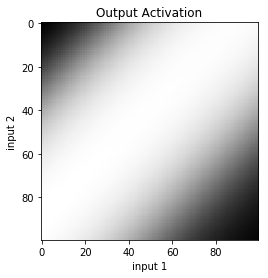

In [43]:
import numpy as np
import matplotlib.pyplot as plt
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()